In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [4]:
import yfinance as yf


In [5]:
a=[2,4,3]

In [6]:
print(a)

[2, 4, 3]


In [7]:
df = yf.download('MSFT','2019-01-01','2023-10-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
data = df.filter(['Close'])

In [9]:
data

,Close
Date,
2019-01-02,101.120003
2019-01-03,97.400002
2019-01-04,101.930000
2019-01-07,102.059998
2019-01-08,102.800003
...,...
2023-09-25,317.540009
2023-09-26,312.140015
2023-09-27,312.790009


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,96.023270,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,92.490768,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,96.792435,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,96.915894,35656100
2019-01-08,103.040001,103.970001,101.709999,102.800003,97.618576,31514400
...,...,...,...,...,...,...
2023-09-25,316.589996,317.670013,315.000000,317.540009,316.896820,17836000
2023-09-26,315.130005,315.880005,310.019989,312.140015,311.507751,26297600
2023-09-27,312.299988,314.299988,309.690002,312.790009,312.156433,19410100


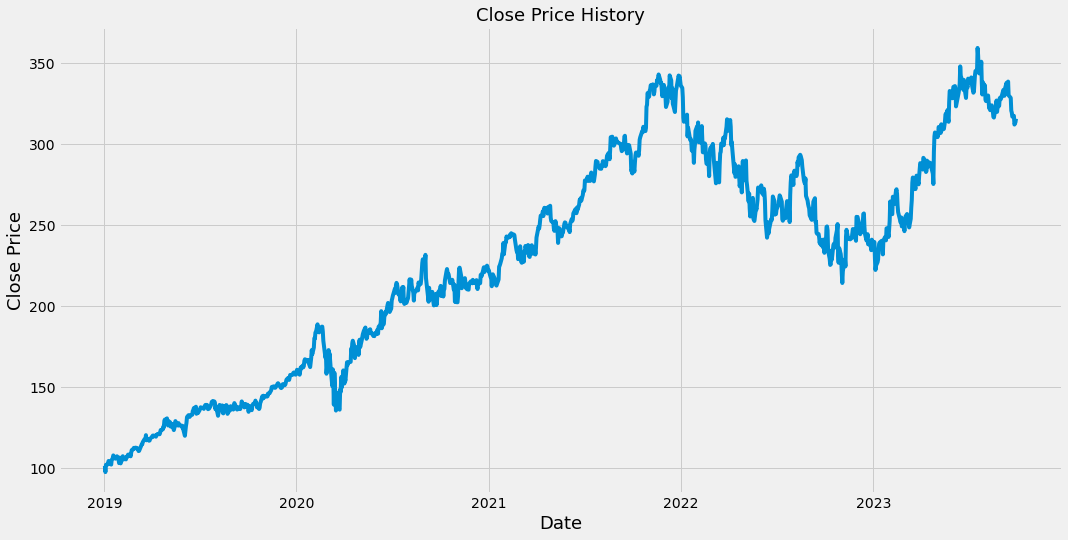

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [13]:
def SMA(data, period =30, column='Close'):
    return data[column].rolling(window=period).mean()

In [18]:
df['SMA20']= SMA(df,20)
df['SMA50']= SMA(df,50)

In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA20,SMA50
Date,,,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,96.023270,35329300,NaN,NaN
2019-01-03,100.099998,100.190002,97.199997,97.400002,92.490768,42579100,NaN,NaN
2019-01-04,99.720001,102.510002,98.930000,101.930000,96.792435,44060600,NaN,NaN
2019-01-07,101.639999,103.269997,100.980003,102.059998,96.915894,35656100,NaN,NaN
2019-01-08,103.040001,103.970001,101.709999,102.800003,97.618576,31514400,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-09-25,316.589996,317.670013,315.000000,317.540009,316.896820,17836000,328.759001,330.391000
2023-09-26,315.130005,315.880005,310.019989,312.140015,311.507751,26297600,328.181001,329.719200
2023-09-27,312.299988,314.299988,309.690002,312.790009,312.156433,19410100,327.400002,328.785200


In [20]:
df['Signal'] = np.where(df['SMA20']>df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] =np.where(df['Position']==1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Position']==-1, df['Close'], np.NAN)

In [21]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA20,SMA50,Signal,Position,Buy,Sell
Date,,,,,,,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,96.023270,35329300,NaN,NaN,0,NaN,NaN,NaN
2019-01-03,100.099998,100.190002,97.199997,97.400002,92.490768,42579100,NaN,NaN,0,0.0,NaN,NaN
2019-01-04,99.720001,102.510002,98.930000,101.930000,96.792435,44060600,NaN,NaN,0,0.0,NaN,NaN
2019-01-07,101.639999,103.269997,100.980003,102.059998,96.915894,35656100,NaN,NaN,0,0.0,NaN,NaN
2019-01-08,103.040001,103.970001,101.709999,102.800003,97.618576,31514400,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,316.589996,317.670013,315.000000,317.540009,316.896820,17836000,328.759001,330.391000,0,0.0,NaN,NaN
2023-09-26,315.130005,315.880005,310.019989,312.140015,311.507751,26297600,328.181001,329.719200,0,0.0,NaN,NaN
2023-09-27,312.299988,314.299988,309.690002,312.790009,312.156433,19410100,327.400002,328.785200,0,0.0,NaN,NaN


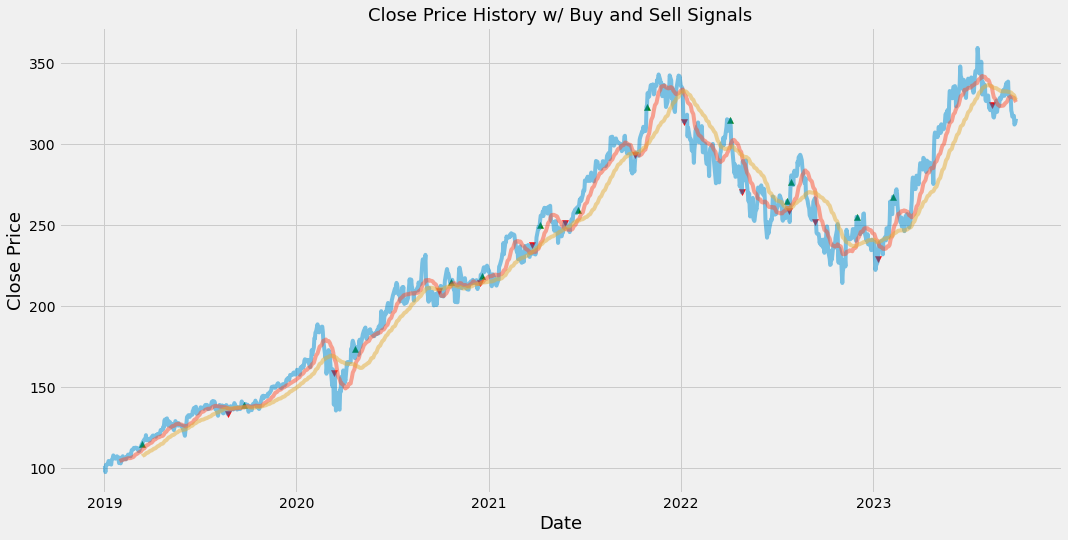

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy and Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha =0.5, label= 'Close')
plt.plot(df['SMA20'], alpha =0.5, label= 'SMA20')
plt.plot(df['SMA50'], alpha =0.5, label= 'SMA50')
plt.scatter(df.index, df['Buy'], alpha =1, label='Buy Signal', marker='^', color= 'green')
plt.scatter(df.index, df['Sell'], alpha =1, label='Sell Signal', marker='v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [29]:
buydates, selldates = [],[]
buy, sell = [],[]
for row in range(len(df)):
    if df.iloc[row]['Position'] ==1:
        #buydates.append(df.iloc[row]['Date'])
        buy.append(df.iloc[row]['Buy'])
    elif df.iloc[row]['Position'] == -1:
        #selldates.append(df.iloc[row]['Date'])
        sell.append(df.iloc[row]['Sell'])
    
    
print(buydates)
print(buy)
print(sell)

[]
[114.58999633789062, 139.13999938964844, 173.52000427246094, 214.8000030517578, 218.58999633789062, 249.89999389648438, 259.42999267578125, 323.1700134277344, 314.9700012207031, 264.8399963378906, 276.4100036621094, 255.13999938964844, 267.55999755859375]
[133.38999938964844, 158.8300018310547, 209.44000244140625, 214.1999969482422, 237.5800018310547, 251.49000549316406, 293.1099853515625, 313.8800048828125, 270.2200012207031, 258.8299865722656, 251.99000549316406, 228.85000610351562, 324.0400085449219]


In [33]:
df_result = pd.DataFrame()
df_result['buy'] = pd.DataFrame(buy)
df_result['sell'] = pd.DataFrame(sell)
df_result['profit'] = df_result['sell'] - df_result['buy']
df_result['cum_profit'] = df_result['profit'].cumsum()

df_result

,buy,sell,profit,cum_profit
0,114.589996,133.389999,18.800003,18.800003
1,139.139999,158.830002,19.690002,38.490005
2,173.520004,209.440002,35.919998,74.410004
3,214.800003,214.199997,-0.600006,73.809998
4,218.589996,237.580002,18.990005,92.800003
5,249.899994,251.490005,1.590012,94.390015
6,259.429993,293.109985,33.679993,128.070007
7,323.170013,313.880005,-9.290009,118.779999
8,314.970001,270.220001,-44.750000,74.029999
9,264.839996,258.829987,-6.010010,68.019989
